In [1]:
# Principal Component Analysis (PCA)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_excel('/content/drive/My Drive/from dr/dataset.xlsx')

In [3]:
# Remove columns and create a new DataFrame
df = pd.DataFrame(dataset)
reduced_dataset = df.drop(columns=['WHOWID', 'ORIG_ID', 'PARTICIPANT_ID', 'BIRTH_WEIGHT', 'age_death_b1', 'age_death_b2', 'age_death_b3', 'SBP2', 'DBP2', 'UDIP_PROT2', 'SBP3', 'DBP3', 'UDIP_PROT3', 'SBP4', 'DBP4', 'UDIP_PROT4', 'DEL_DATE', 'APH', 'TYPEDELIV', 'BIRTH_WEIGHT3', 'BABY_SEX3', 'BIRTH_OUTCOME3', 'BABY_ID3', 'BIRTH_WEIGHT2', 'BABY_SEX2', 'BIRTH_OUTCOME2', 'BABY_ID2', 'BIRTH_WEIGHT1', 'BABY_SEX1', 'BIRTH_OUTCOME1', 'BABY_ID1', 'BIRTH_WEIGHT', 'BABY_SEX', 'BIRTH_OUTCOME', 'SINGLE_TWIN',])

In [4]:
# Display the new DataFrame
print(reduced_dataset)

      PW_AGE  PW_EDUCATION  PREV_SB  PREV_MIS  PREV_PTB  PREV_MULTIP  PREV_CS  \
0         36          10.0        1         2         0            1        0   
1         32          10.0        0         0         0            0        0   
2         18           6.0        0         1         0            0        0   
3         30           6.0        1         0         0            0        0   
4         22          10.0      -88       -88       -88          -88      -88   
...      ...           ...      ...       ...       ...          ...      ...   
4496      37           0.0        1         2         1            0        0   
4497      35          10.0        1         0         0            0        0   
4498      32           6.0        0         0         0            0        0   
4499      30          10.0      -88       -88       -88          -88      -88   
4500      30           6.0        0         1         0            0        0   

     WEALTH_INDEX  GRAVIDIT

In [5]:
# Count missing values for each column
missing_values_count = reduced_dataset.isnull().sum()

# Print the count of missing values for each column
print("Missing values count for each column:")
print(missing_values_count)

Missing values count for each column:
PW_AGE            0
PW_EDUCATION     16
PREV_SB           0
PREV_MIS          0
PREV_PTB          0
PREV_MULTIP       0
PREV_CS           0
WEALTH_INDEX      0
GRAVIDITY         0
PARITY            0
LABOUR_HTN        0
LABOUR_24         0
SBP1            199
DBP1            199
UDIP_PROT1      199
GAGEBRTH        135
MAT_WEIGHT      331
dtype: int64


In [6]:
# Filter columns with missing values
columns_with_missing = missing_values_count[missing_values_count > 0]
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
PW_EDUCATION     16
SBP1            199
DBP1            199
UDIP_PROT1      199
GAGEBRTH        135
MAT_WEIGHT      331
dtype: int64


In [7]:
skew_sbp1 = reduced_dataset['SBP1'].skew()
skew_dbp1 = reduced_dataset['DBP1'].skew()
skew_gageb = reduced_dataset['GAGEBRTH'].skew()
skew_matweight = reduced_dataset['MAT_WEIGHT'].skew()
print(f"Skewness of SBP1: {skew_sbp1}")
print(f"Skewness of GAGEBRTH: {skew_gageb}")
print(f"Skewness of MAT_WEIGHT: {skew_matweight}")
print(f"Skewness of DBP1: {skew_dbp1}")
#If skewness is close to 0: Use mean.
#If skewness is significant (> ±0.5): Use median.


Skewness of SBP1: 0.9413594346125838
Skewness of GAGEBRTH: -4.754683157506789
Skewness of MAT_WEIGHT: 1.0464171227854668
Skewness of DBP1: 1.12296540195461


In [8]:
# Impute missing values
reduced_dataset['PW_EDUCATION'] = reduced_dataset['PW_EDUCATION'].fillna(reduced_dataset['PW_EDUCATION'].mode()[0])
reduced_dataset['SBP1'] = reduced_dataset['SBP1'].fillna(reduced_dataset['SBP1'].median())
reduced_dataset['DBP1'] = reduced_dataset['DBP1'].fillna(reduced_dataset['DBP1'].median())
reduced_dataset['UDIP_PROT1'] = reduced_dataset['UDIP_PROT1'].fillna(reduced_dataset['UDIP_PROT1'].mode()[0])
reduced_dataset['GAGEBRTH'] = reduced_dataset['GAGEBRTH'].fillna(reduced_dataset['GAGEBRTH'].median())
reduced_dataset['MAT_WEIGHT'] = reduced_dataset['MAT_WEIGHT'].fillna(reduced_dataset['MAT_WEIGHT'].median())


In [9]:
print(reduced_dataset.isnull().sum())


PW_AGE          0
PW_EDUCATION    0
PREV_SB         0
PREV_MIS        0
PREV_PTB        0
PREV_MULTIP     0
PREV_CS         0
WEALTH_INDEX    0
GRAVIDITY       0
PARITY          0
LABOUR_HTN      0
LABOUR_24       0
SBP1            0
DBP1            0
UDIP_PROT1      0
GAGEBRTH        0
MAT_WEIGHT      0
dtype: int64


In [10]:
reduced_dataset.info()  # Provides column names, data types, and non-null counts
reduced_dataset.describe()  # Displays summary statistics for numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4501 entries, 0 to 4500
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PW_AGE        4501 non-null   int64  
 1   PW_EDUCATION  4501 non-null   float64
 2   PREV_SB       4501 non-null   int64  
 3   PREV_MIS      4501 non-null   int64  
 4   PREV_PTB      4501 non-null   int64  
 5   PREV_MULTIP   4501 non-null   int64  
 6   PREV_CS       4501 non-null   int64  
 7   WEALTH_INDEX  4501 non-null   object 
 8   GRAVIDITY     4501 non-null   int64  
 9   PARITY        4501 non-null   int64  
 10  LABOUR_HTN    4501 non-null   int64  
 11  LABOUR_24     4501 non-null   int64  
 12  SBP1          4501 non-null   float64
 13  DBP1          4501 non-null   float64
 14  UDIP_PROT1    4501 non-null   float64
 15  GAGEBRTH      4501 non-null   float64
 16  MAT_WEIGHT    4501 non-null   float64
dtypes: float64(6), int64(10), object(1)
memory usage: 597.9+ KB


,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,GRAVIDITY,PARITY,LABOUR_HTN,LABOUR_24,SBP1,DBP1,UDIP_PROT1,GAGEBRTH,MAT_WEIGHT
count,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000,4501.000000
mean,27.996001,7.385914,-15.541435,-15.365030,-18.932459,-15.594979,-15.595201,4.333037,-12.363030,-9.511442,-9.190402,114.024439,71.097978,-0.265274,272.570318,59.592735
std,6.259356,3.470404,33.622445,33.709515,35.642800,33.596841,33.596734,5.667368,35.169402,25.859581,25.488934,11.094176,7.600816,6.320782,25.081799,13.133963
min,18.000000,0.000000,-88.000000,-88.000000,-88.000000,-88.000000,-88.000000,-77.000000,-88.000000,-88.000000,-88.000000,90.000000,57.000000,-77.000000,60.000000,35.000000
25%,23.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,107.000000,65.000000,0.000000,271.000000,50.600000
50%,27.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,0.000000,113.000000,70.000000,0.000000,277.000000,57.000000
75%,32.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,0.000000,120.000000,76.000000,0.000000,283.000000,65.900000
max,49.000000,15.000000,1.000000,7.000000,1.000000,1.000000,1.000000,16.000000,15.000000,1.000000,1.000000,205.000000,119.000000,2.000000,328.000000,125.000000


In [11]:
reduced_dataset.tail(20)  # Shows the last 20 rows

,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,WEALTH_INDEX,GRAVIDITY,PARITY,LABOUR_HTN,LABOUR_24,SBP1,DBP1,UDIP_PROT1,GAGEBRTH,MAT_WEIGHT
4481,19,10.0,0,0,0,0,0,Rich,3,2,0,1,91.0,60.0,0.0,264.0,46.0
4482,39,10.0,0,2,0,0,0,Middle,8,5,0,0,125.0,73.0,0.0,271.0,89.9
4483,22,6.0,-88,-88,-88,-88,-88,Rich,1,-88,0,0,106.0,60.0,2.0,275.0,59.0
4484,26,6.0,1,0,0,0,0,Rich,7,5,0,0,128.0,73.0,0.0,273.0,74.3
4485,40,0.0,0,2,0,0,0,Poor,12,9,0,0,129.0,87.0,0.0,265.0,52.9
4486,35,6.0,0,1,0,0,0,Richest,10,8,1,0,123.0,82.0,0.0,287.0,64.0
4487,26,6.0,0,0,0,0,0,Poorest,5,4,0,0,111.0,69.0,0.0,289.0,45.1
4488,32,10.0,0,0,0,0,0,Rich,5,4,0,0,113.0,81.0,0.0,278.0,65.3
4489,25,0.0,1,1,1,0,0,Middle,5,2,0,0,133.0,81.0,0.0,245.0,77.0
4490,18,6.0,0,0,0,0,0,Rich,3,2,0,0,91.0,63.0,0.0,260.0,43.8


In [12]:
#Replace Placeholder Values (-88) with NaN
reduced_dataset.replace(-88, np.nan, inplace=True)

In [13]:
reduced_dataset.tail(20)  # Shows the last 20 rows

,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,WEALTH_INDEX,GRAVIDITY,PARITY,LABOUR_HTN,LABOUR_24,SBP1,DBP1,UDIP_PROT1,GAGEBRTH,MAT_WEIGHT
4481,19,10.0,0.0,0.0,0.0,0.0,0.0,Rich,3,2.0,0.0,1.0,91.0,60.0,0.0,264.0,46.0
4482,39,10.0,0.0,2.0,0.0,0.0,0.0,Middle,8,5.0,0.0,0.0,125.0,73.0,0.0,271.0,89.9
4483,22,6.0,NaN,NaN,NaN,NaN,NaN,Rich,1,NaN,0.0,0.0,106.0,60.0,2.0,275.0,59.0
4484,26,6.0,1.0,0.0,0.0,0.0,0.0,Rich,7,5.0,0.0,0.0,128.0,73.0,0.0,273.0,74.3
4485,40,0.0,0.0,2.0,0.0,0.0,0.0,Poor,12,9.0,0.0,0.0,129.0,87.0,0.0,265.0,52.9
4486,35,6.0,0.0,1.0,0.0,0.0,0.0,Richest,10,8.0,1.0,0.0,123.0,82.0,0.0,287.0,64.0
4487,26,6.0,0.0,0.0,0.0,0.0,0.0,Poorest,5,4.0,0.0,0.0,111.0,69.0,0.0,289.0,45.1
4488,32,10.0,0.0,0.0,0.0,0.0,0.0,Rich,5,4.0,0.0,0.0,113.0,81.0,0.0,278.0,65.3
4489,25,0.0,1.0,1.0,1.0,0.0,0.0,Middle,5,2.0,0.0,0.0,133.0,81.0,0.0,245.0,77.0
4490,18,6.0,0.0,0.0,0.0,0.0,0.0,Rich,3,2.0,0.0,0.0,91.0,63.0,0.0,260.0,43.8


In [14]:
# Count occurrences of -77 across all columns
count_in_all_columns = (reduced_dataset == -77).sum()
print("Count of -77 in each column:")
print(count_in_all_columns)

Count of -77 in each column:
PW_AGE            0
PW_EDUCATION      0
PREV_SB          16
PREV_MIS         16
PREV_PTB        211
PREV_MULTIP      16
PREV_CS          16
WEALTH_INDEX      0
GRAVIDITY        16
PARITY           16
LABOUR_HTN      426
LABOUR_24       407
SBP1              0
DBP1              0
UDIP_PROT1       30
GAGEBRTH          0
MAT_WEIGHT        0
dtype: int64


In [15]:
#Replace Placeholder Values (-77) with NaN
reduced_dataset.replace(-77, np.nan, inplace=True)

In [16]:
# Count NaN values for each column
missing_values_count = reduced_dataset.isna().sum()

# Display the result
print("Missing values count per column:")
print(missing_values_count)


Missing values count per column:
PW_AGE            0
PW_EDUCATION      0
PREV_SB         801
PREV_MIS        801
PREV_PTB        996
PREV_MULTIP     801
PREV_CS         801
WEALTH_INDEX      0
GRAVIDITY        16
PARITY          801
LABOUR_HTN      541
LABOUR_24       522
SBP1              0
DBP1              0
UDIP_PROT1       30
GAGEBRTH          0
MAT_WEIGHT        0
dtype: int64


<Axes: >

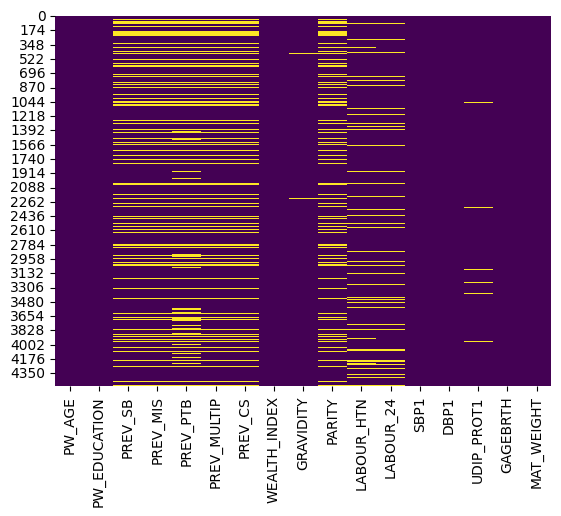

In [17]:
#Before imputing or removing, check if the missingness has a pattern:
# Use visualization tools (e.g., seaborn.heatmap) to see if missing values are concentrated in specific rows/groups:
import seaborn as sns
sns.heatmap(reduced_dataset.isna(), cbar=False, cmap="viridis")

<Axes: >

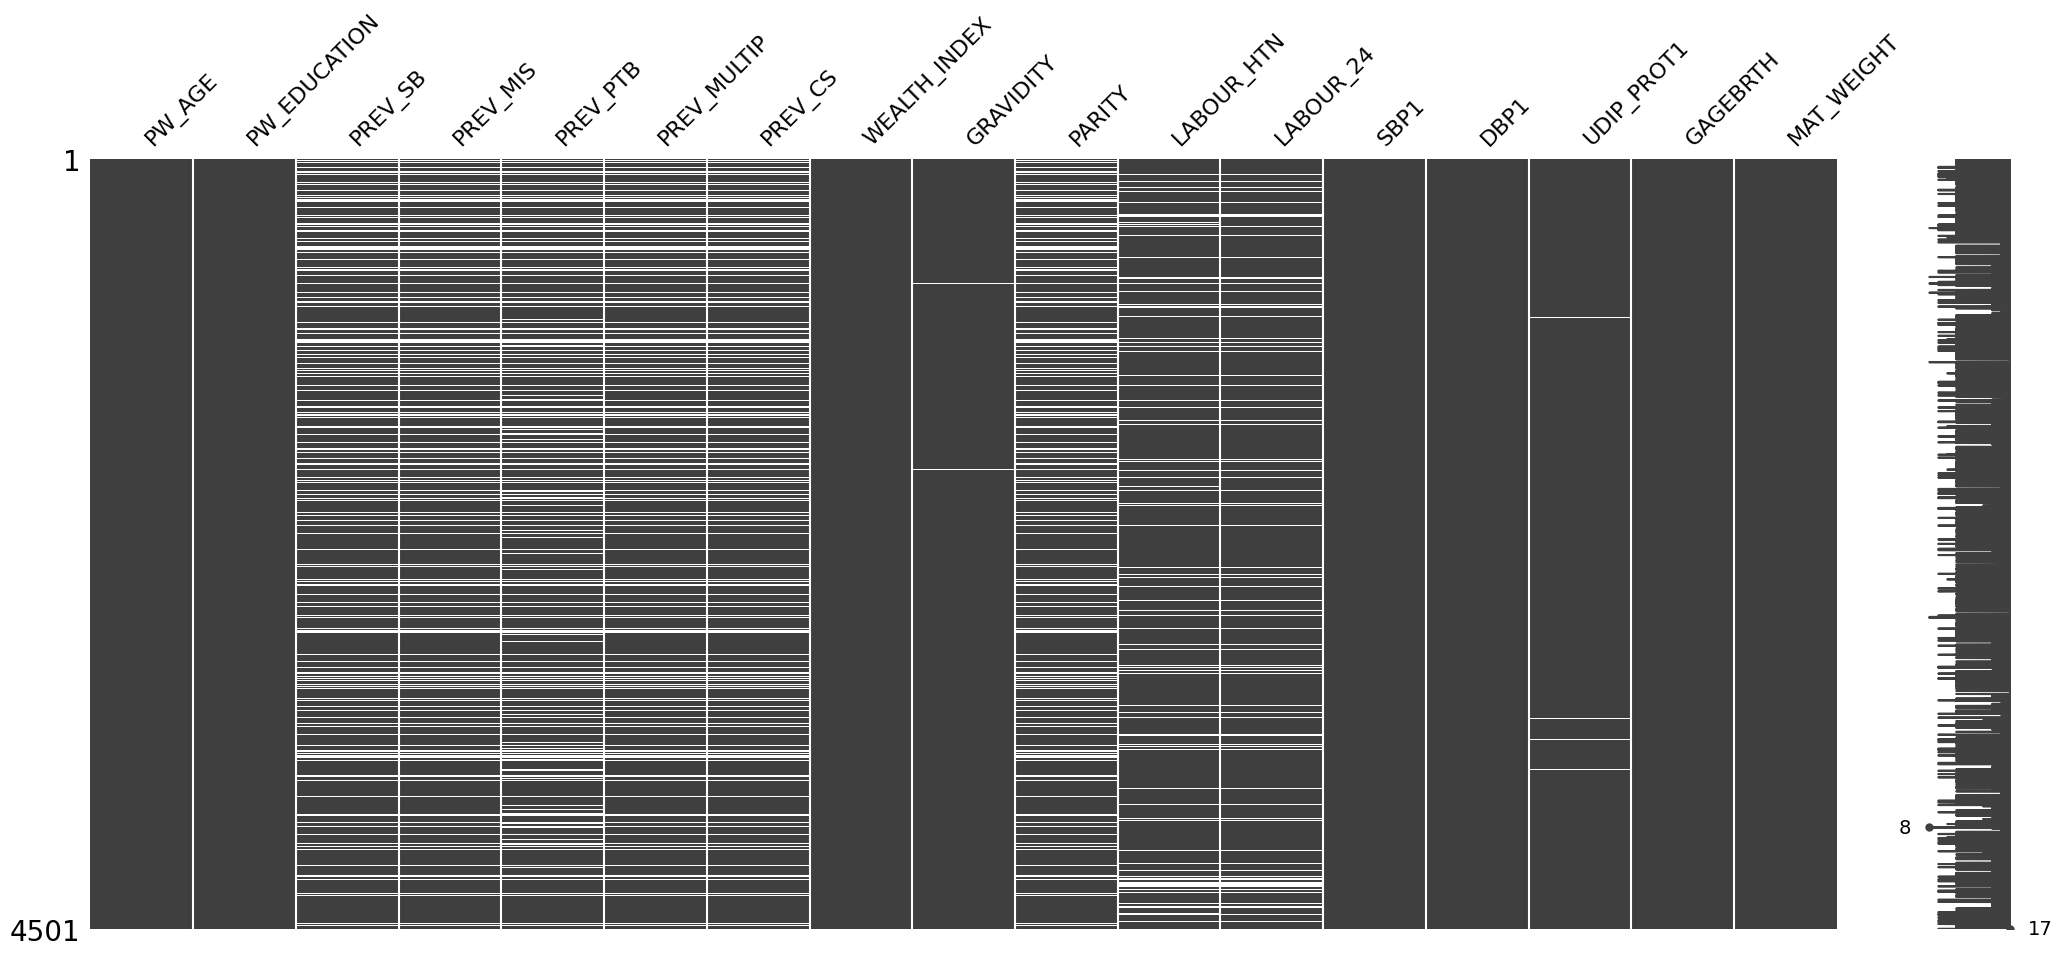

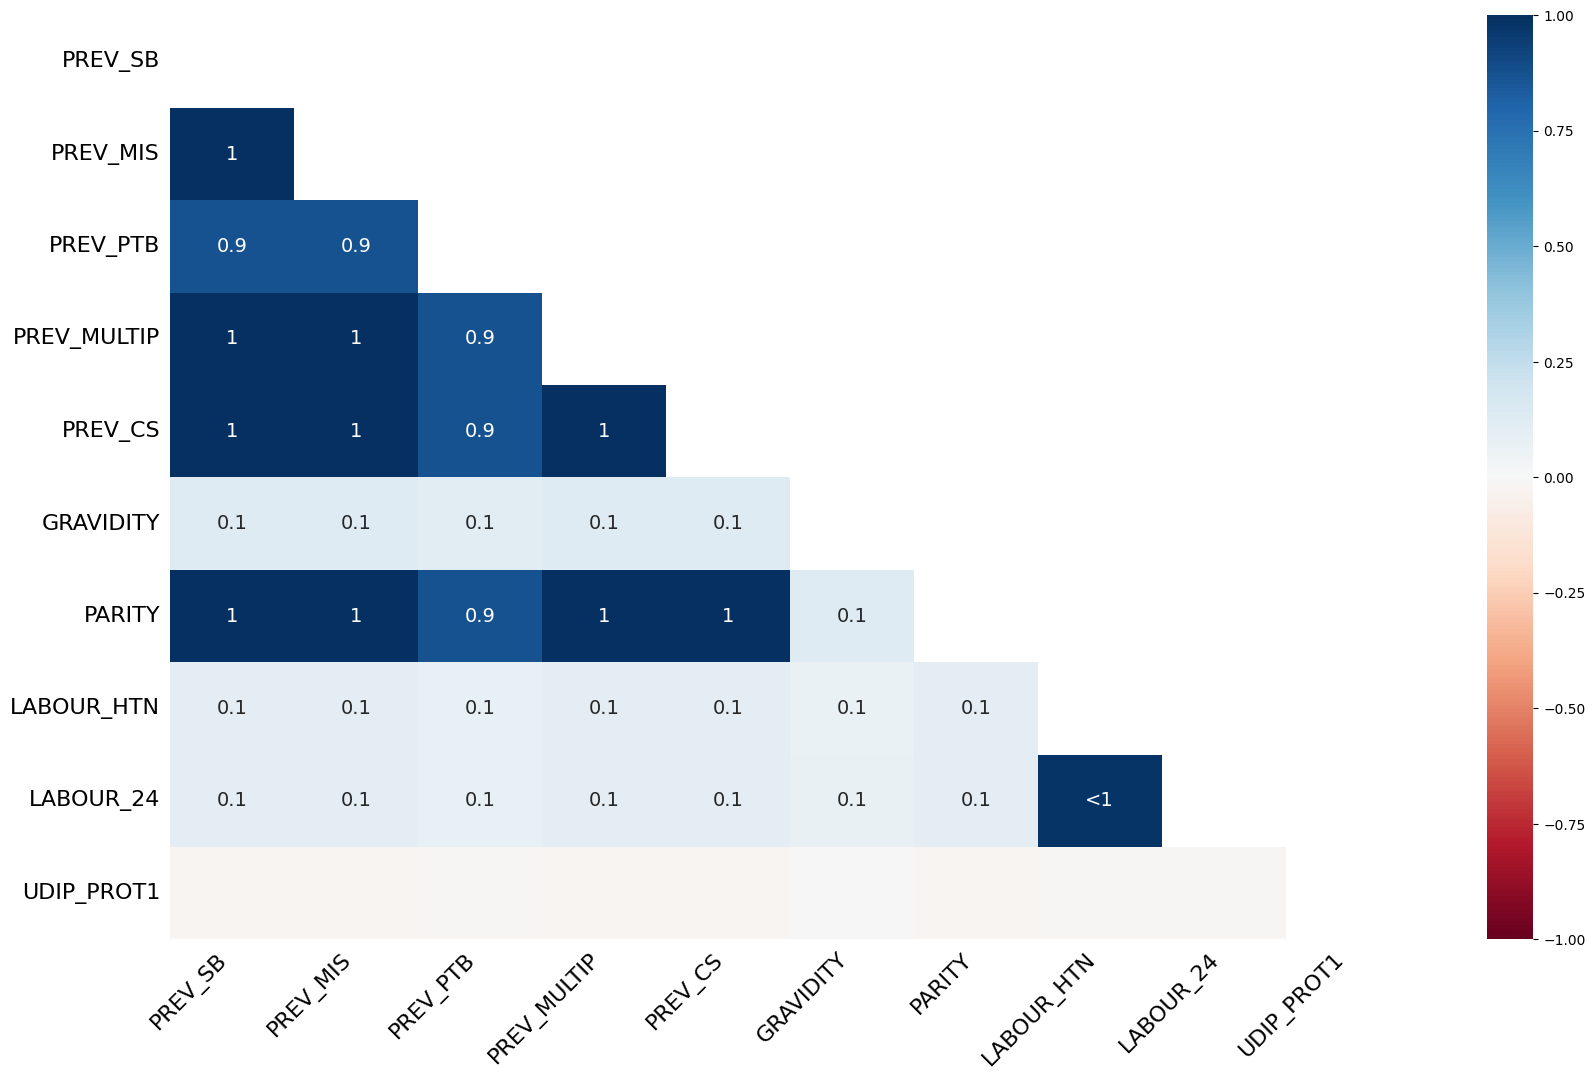

In [18]:
import missingno as msno
msno.matrix(reduced_dataset)  # Visualize missing data
msno.heatmap(reduced_dataset) # Correlation heatmap for missingness


In [19]:
skew_gravid = reduced_dataset['GRAVIDITY'].skew()
print(f"Skewness of GRAVIDITY: {skew_gravid}")
#If skewness is close to 0: Use mean.
#If skewness is significant (> ±0.5): Use median.

Skewness of GRAVIDITY: 0.7091358372192437


In [20]:
# Impute missing values
reduced_dataset['PREV_SB'] = reduced_dataset['PREV_SB'].fillna(reduced_dataset['PREV_SB'].mode()[0])
reduced_dataset['PREV_MIS'] = reduced_dataset['PREV_MIS'].fillna(reduced_dataset['PREV_MIS'].mode()[0])
reduced_dataset['PREV_PTB'] = reduced_dataset['PREV_PTB'].fillna(reduced_dataset['PREV_PTB'].mode()[0])
reduced_dataset['PREV_MULTIP'] = reduced_dataset['PREV_MULTIP'].fillna(reduced_dataset['PREV_MULTIP'].mode()[0])
reduced_dataset['PREV_CS'] = reduced_dataset['PREV_CS'].fillna(reduced_dataset['PREV_CS'].mode()[0])
reduced_dataset['PARITY'] = reduced_dataset['PARITY'].fillna(reduced_dataset['PARITY'].mode()[0])
reduced_dataset['LABOUR_HTN'] = reduced_dataset['LABOUR_HTN'].fillna(reduced_dataset['LABOUR_HTN'].mode()[0])
reduced_dataset['LABOUR_24'] = reduced_dataset['LABOUR_24'].fillna(reduced_dataset['LABOUR_24'].mode()[0])
reduced_dataset['UDIP_PROT1'] = reduced_dataset['UDIP_PROT1'].fillna(reduced_dataset['UDIP_PROT1'].mode()[0])
reduced_dataset['GRAVIDITY'] = reduced_dataset['GRAVIDITY'].fillna(reduced_dataset['GRAVIDITY'].median())

In [21]:
missing_percentage = (reduced_dataset.isna().sum() / len(df)) * 100
print(missing_percentage)


PW_AGE          0.0
PW_EDUCATION    0.0
PREV_SB         0.0
PREV_MIS        0.0
PREV_PTB        0.0
PREV_MULTIP     0.0
PREV_CS         0.0
WEALTH_INDEX    0.0
GRAVIDITY       0.0
PARITY          0.0
LABOUR_HTN      0.0
LABOUR_24       0.0
SBP1            0.0
DBP1            0.0
UDIP_PROT1      0.0
GAGEBRTH        0.0
MAT_WEIGHT      0.0
dtype: float64


In [22]:
# Count NaN values for each column
missing_values_count = reduced_dataset.isna().sum()

# Display the result
print("Missing values count per column:")
print(missing_values_count)

Missing values count per column:
PW_AGE          0
PW_EDUCATION    0
PREV_SB         0
PREV_MIS        0
PREV_PTB        0
PREV_MULTIP     0
PREV_CS         0
WEALTH_INDEX    0
GRAVIDITY       0
PARITY          0
LABOUR_HTN      0
LABOUR_24       0
SBP1            0
DBP1            0
UDIP_PROT1      0
GAGEBRTH        0
MAT_WEIGHT      0
dtype: int64


In [23]:
reduced_dataset.tail(20)  # Shows the last 20 rows

,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,WEALTH_INDEX,GRAVIDITY,PARITY,LABOUR_HTN,LABOUR_24,SBP1,DBP1,UDIP_PROT1,GAGEBRTH,MAT_WEIGHT
4481,19,10.0,0.0,0.0,0.0,0.0,0.0,Rich,3.0,2.0,0.0,1.0,91.0,60.0,0.0,264.0,46.0
4482,39,10.0,0.0,2.0,0.0,0.0,0.0,Middle,8.0,5.0,0.0,0.0,125.0,73.0,0.0,271.0,89.9
4483,22,6.0,0.0,0.0,0.0,0.0,0.0,Rich,1.0,2.0,0.0,0.0,106.0,60.0,2.0,275.0,59.0
4484,26,6.0,1.0,0.0,0.0,0.0,0.0,Rich,7.0,5.0,0.0,0.0,128.0,73.0,0.0,273.0,74.3
4485,40,0.0,0.0,2.0,0.0,0.0,0.0,Poor,12.0,9.0,0.0,0.0,129.0,87.0,0.0,265.0,52.9
4486,35,6.0,0.0,1.0,0.0,0.0,0.0,Richest,10.0,8.0,1.0,0.0,123.0,82.0,0.0,287.0,64.0
4487,26,6.0,0.0,0.0,0.0,0.0,0.0,Poorest,5.0,4.0,0.0,0.0,111.0,69.0,0.0,289.0,45.1
4488,32,10.0,0.0,0.0,0.0,0.0,0.0,Rich,5.0,4.0,0.0,0.0,113.0,81.0,0.0,278.0,65.3
4489,25,0.0,1.0,1.0,1.0,0.0,0.0,Middle,5.0,2.0,0.0,0.0,133.0,81.0,0.0,245.0,77.0
4490,18,6.0,0.0,0.0,0.0,0.0,0.0,Rich,3.0,2.0,0.0,0.0,91.0,63.0,0.0,260.0,43.8


In [24]:
reduced_dataset['SPONTANEOUS_ABORTION'] = (reduced_dataset['GAGEBRTH'] < 140).astype(int)

In [25]:
reduced_dataset.tail(20)  # Shows the last 20 rows

,PW_AGE,PW_EDUCATION,PREV_SB,PREV_MIS,PREV_PTB,PREV_MULTIP,PREV_CS,WEALTH_INDEX,GRAVIDITY,PARITY,LABOUR_HTN,LABOUR_24,SBP1,DBP1,UDIP_PROT1,GAGEBRTH,MAT_WEIGHT,SPONTANEOUS_ABORTION
4481,19,10.0,0.0,0.0,0.0,0.0,0.0,Rich,3.0,2.0,0.0,1.0,91.0,60.0,0.0,264.0,46.0,0
4482,39,10.0,0.0,2.0,0.0,0.0,0.0,Middle,8.0,5.0,0.0,0.0,125.0,73.0,0.0,271.0,89.9,0
4483,22,6.0,0.0,0.0,0.0,0.0,0.0,Rich,1.0,2.0,0.0,0.0,106.0,60.0,2.0,275.0,59.0,0
4484,26,6.0,1.0,0.0,0.0,0.0,0.0,Rich,7.0,5.0,0.0,0.0,128.0,73.0,0.0,273.0,74.3,0
4485,40,0.0,0.0,2.0,0.0,0.0,0.0,Poor,12.0,9.0,0.0,0.0,129.0,87.0,0.0,265.0,52.9,0
4486,35,6.0,0.0,1.0,0.0,0.0,0.0,Richest,10.0,8.0,1.0,0.0,123.0,82.0,0.0,287.0,64.0,0
4487,26,6.0,0.0,0.0,0.0,0.0,0.0,Poorest,5.0,4.0,0.0,0.0,111.0,69.0,0.0,289.0,45.1,0
4488,32,10.0,0.0,0.0,0.0,0.0,0.0,Rich,5.0,4.0,0.0,0.0,113.0,81.0,0.0,278.0,65.3,0
4489,25,0.0,1.0,1.0,1.0,0.0,0.0,Middle,5.0,2.0,0.0,0.0,133.0,81.0,0.0,245.0,77.0,0
4490,18,6.0,0.0,0.0,0.0,0.0,0.0,Rich,3.0,2.0,0.0,0.0,91.0,63.0,0.0,260.0,43.8,0


In [26]:
# Count occurrences of Unknown across all columns
count_in_all_columns = (reduced_dataset == 'Unknown').sum()
print("Count of Unknown in each column:")
print(count_in_all_columns)

Count of Unknown in each column:
PW_AGE                  0
PW_EDUCATION            0
PREV_SB                 0
PREV_MIS                0
PREV_PTB                0
PREV_MULTIP             0
PREV_CS                 0
WEALTH_INDEX            0
GRAVIDITY               0
PARITY                  0
LABOUR_HTN              0
LABOUR_24               0
SBP1                    0
DBP1                    0
UDIP_PROT1              0
GAGEBRTH                0
MAT_WEIGHT              0
SPONTANEOUS_ABORTION    0
dtype: int64


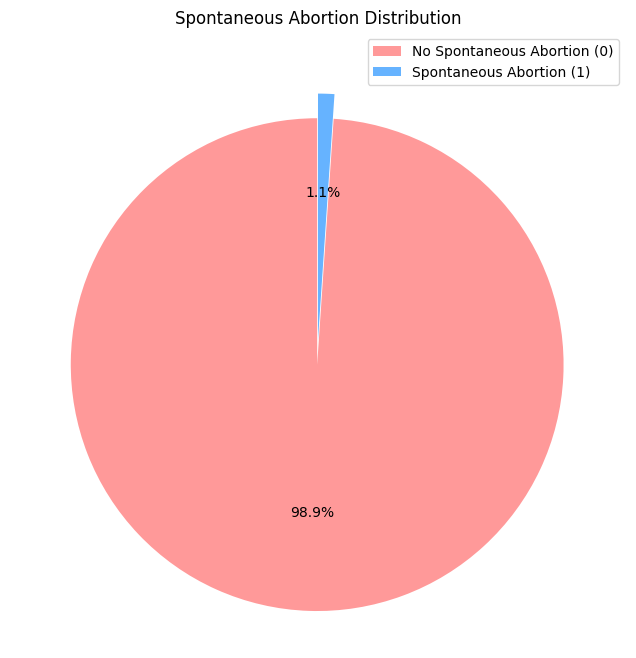

In [27]:
import matplotlib.pyplot as plt

# Count the occurrences of each category
abortion_counts = reduced_dataset['SPONTANEOUS_ABORTION'].value_counts()

# Define labels with descriptions
labels = ['No Spontaneous Abortion (0)', 'Spontaneous Abortion (1)']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    abortion_counts,
    labels=None,  # Remove labels from the chart
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    explode=(0.1, 0)
)

# Add a legend for clarity
plt.legend(labels, loc="upper right")
plt.title('Spontaneous Abortion Distribution')
plt.show()

<ipython-input-28-7a303549f50b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=abortion_counts.index, y=abortion_counts.values, palette='pastel')


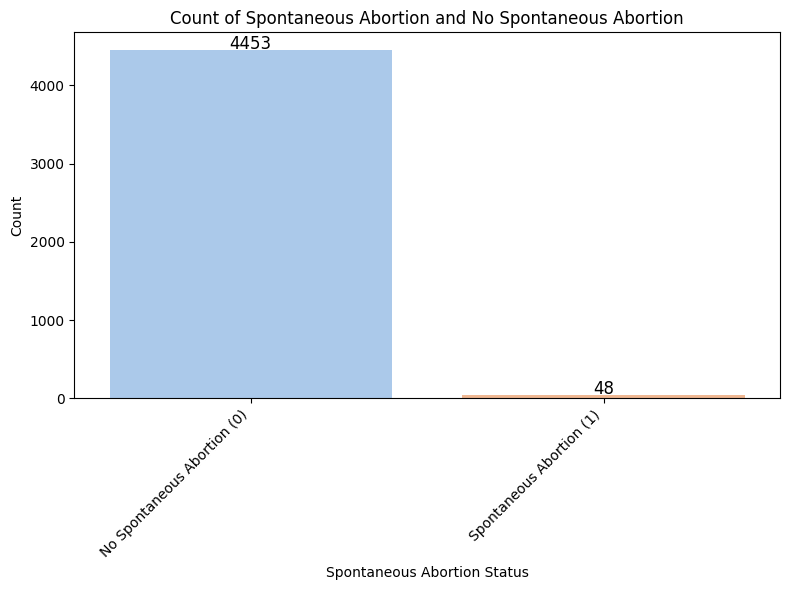

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category
abortion_counts = reduced_dataset['SPONTANEOUS_ABORTION'].value_counts()

# Define labels for clarity
labels = ['No Spontaneous Abortion (0)', 'Spontaneous Abortion (1)']

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=abortion_counts.index, y=abortion_counts.values, palette='pastel')

# Customize the chart
plt.xticks(ticks=[0, 1], labels=labels, rotation=45, ha='right')
plt.xlabel('Spontaneous Abortion Status')
plt.ylabel('Count')
plt.title('Count of Spontaneous Abortion and No Spontaneous Abortion')

# Add value annotations
for i, count in enumerate(abortion_counts.values):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


In [29]:
features = reduced_dataset.drop(columns=['SPONTANEOUS_ABORTION', 'GAGEBRTH', 'PW_EDUCATION', 'PARITY', 'LABOUR_HTN', 'LABOUR_24', 'PREV_SB', 'PREV_MIS', 'PREV_PTB', 'PREV_MULTIP', 'PREV_CS', 'WEALTH_INDEX', 'UDIP_PROT1'])
target = reduced_dataset['SPONTANEOUS_ABORTION']


In [30]:
features.head()

,PW_AGE,GRAVIDITY,SBP1,DBP1,MAT_WEIGHT
0,36,8.0,102.0,69.0,45.8
1,32,4.0,118.0,79.0,57.0
2,18,3.0,112.0,67.0,68.0
3,30,8.0,128.0,61.0,57.0
4,22,1.0,115.0,62.0,57.0


In [31]:
print(features.head())
target.head()

   PW_AGE  GRAVIDITY   SBP1  DBP1  MAT_WEIGHT
0      36        8.0  102.0  69.0        45.8
1      32        4.0  118.0  79.0        57.0
2      18        3.0  112.0  67.0        68.0
3      30        8.0  128.0  61.0        57.0
4      22        1.0  115.0  62.0        57.0


,SPONTANEOUS_ABORTION
0,0
1,0
2,0
3,0
4,0


In [32]:
print(features.isnull().sum())


PW_AGE        0
GRAVIDITY     0
SBP1          0
DBP1          0
MAT_WEIGHT    0
dtype: int64


In [33]:
# scale them for better model performance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features[['PW_AGE', 'GRAVIDITY', 'SBP1', 'DBP1', 'MAT_WEIGHT']] = scaler.fit_transform(features[['PW_AGE', 'GRAVIDITY', 'SBP1', 'DBP1', 'MAT_WEIGHT']])
# Verify the scaled DataFrame
print(features.head())


     PW_AGE  GRAVIDITY      SBP1      DBP1  MAT_WEIGHT
0  1.278868   1.158015 -1.083972 -0.276051   -1.050275
1  0.639753  -0.212812  0.358386  1.039744   -0.197429
2 -1.597147  -0.555518 -0.182498 -0.539210    0.640188
3  0.320196   1.158015  1.259860 -1.328686   -0.197429
4 -0.958033  -1.240932  0.087944 -1.197107   -0.197429


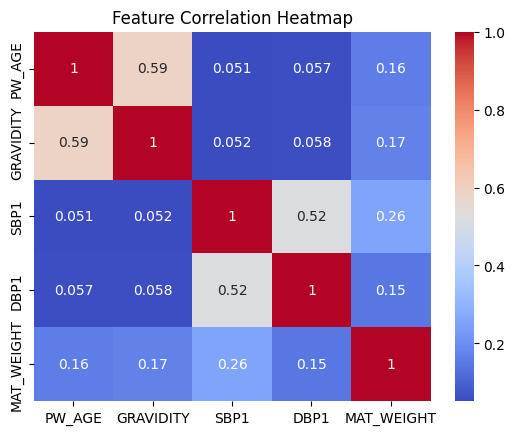

In [34]:
# Check correlations between the features and the target
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

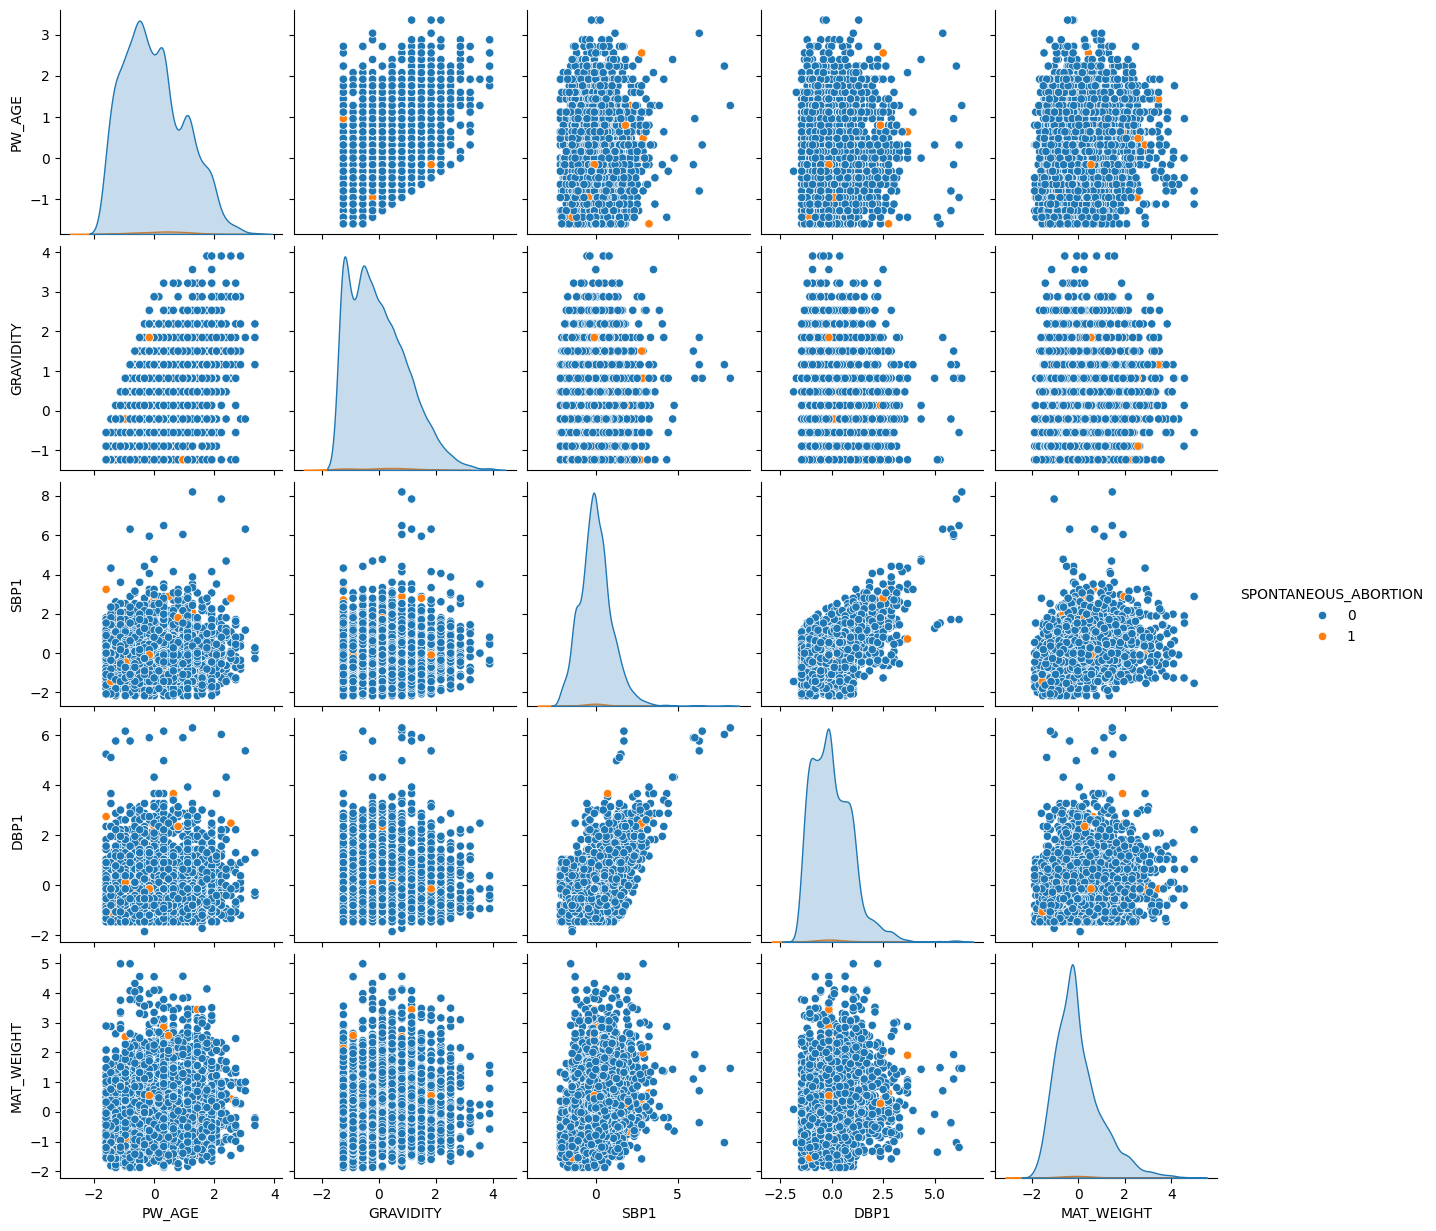

In [35]:
# Visualize relationships between features and SPONTANEOUS_ABORTION
sns.pairplot(pd.concat([features, target], axis=1), hue='SPONTANEOUS_ABORTION')


In [36]:
# Split your data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target #it ensures proportional split
)
print("Training set class distribution:")
print(y_train.value_counts())
print("Test set class distribution:")
print(y_test.value_counts())

Training set class distribution:
SPONTANEOUS_ABORTION
0    3562
1      38
Name: count, dtype: int64
Test set class distribution:
SPONTANEOUS_ABORTION
0    891
1     10
Name: count, dtype: int64


# Import Libraries

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Logistic Regression with Class Weights

In [38]:
# Initialize Logistic Regression with class_weight='balanced'
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
# y_pred_log_reg = log_reg.predict(X_test)
# Threshold Adjustment:
# By adjusting the decision threshold (default is usually 0.5),
# you can make the model more sensitive to the minority class,
# which could improve recall for class 1. For example:
y_pred_log_reg = (log_reg.predict_proba(X_test)[:, 1] > 0.3).astype(int)

# Evaluate the model
print("Logistic Regression Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))


Logistic Regression Evaluation
Confusion Matrix:
[[ 18 873]
 [  0  10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04       891
           1       0.01      1.00      0.02        10

    accuracy                           0.03       901
   macro avg       0.51      0.51      0.03       901
weighted avg       0.99      0.03      0.04       901

ROC-AUC Score: 0.6123456790123456


# Random Forest with Class Weights

In [39]:
# Initialize Random Forest with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Evaluation
Confusion Matrix:
[[890   1]
 [ 10   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       891
           1       0.00      0.00      0.00        10

    accuracy                           0.99       901
   macro avg       0.49      0.50      0.50       901
weighted avg       0.98      0.99      0.98       901

ROC-AUC Score: 0.7569584736251403


# XGBoost

In [40]:
pip install xgboost

In [41]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Instantiate the model
xgb_model = xgb.XGBClassifier(scale_pos_weight=99, random_state=42)  # Adjust the scale_pos_weight for imbalance

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("ROC-AUC Score for XGBoost:", roc_auc_score(y_test, y_pred_prob_xgb))

Confusion Matrix for XGBoost:
[[888   3]
 [  9   1]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       891
           1       0.25      0.10      0.14        10

    accuracy                           0.99       901
   macro avg       0.62      0.55      0.57       901
weighted avg       0.98      0.99      0.98       901

ROC-AUC Score for XGBoost: 0.6946127946127947


# LightGBM:

In [42]:
pip install lightgbm

In [43]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prepare dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters for the model
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'scale_pos_weight': 99,  # Adjust the scale_pos_weight for imbalance
    'learning_rate': 0.1,
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

# Train the model using early stopping with a callback
# Define the early stopping callback
def early_stopping_cb(env):
    """Early stopping callback."""
    is_best_iter = env.iteration == env.best_iteration
    if is_best_iter:
        print(f"Early stopping at iteration {env.iteration}")
    return is_best_iter, is_best_iter


lgb_model = lgb.train(
    params,
    train_data,
    valid_sets=[test_data],
    num_boost_round=1000,  # Maximum number of boosting rounds
    callbacks=[lgb.early_stopping(stopping_rounds=50),  # Early stopping with 50 rounds
              lgb.record_evaluation({})] # Record evaluation results for each iteration
)


# Make predictions
y_pred_lgb = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)
y_pred_lgb_bin = (y_pred_lgb > 0.5).astype(int)

# Evaluation
print("Confusion Matrix for LightGBM:")
print(confusion_matrix(y_test, y_pred_lgb_bin))

print("\nClassification Report for LightGBM:")
print(classification_report(y_test, y_pred_lgb_bin))

print("ROC-AUC Score for LightGBM:", roc_auc_score(y_test, y_pred_lgb))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 38, number of negative: 3562
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 3600, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.010556 -> initscore=-4.540491
[LightGBM] [Info] Start training from score -4.540491
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[83]	valid_0's binary_error: 0.0133185
Confusion Matrix for LightGBM:
[[887   4]
 [  8   2]]

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       891
           1       0.33      0.20      0.25        10

    accuracy                           0.99       901
   macro avg       0.66      0.60      0.62       901
weighted avg   

# Support Vector Machines (SVM)

In [44]:
from sklearn.svm import SVC
# Instantiate the SVM model with class weights to handle imbalance
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)

# Fit the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, y_pred_svm))

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

print("ROC-AUC Score for SVM:", roc_auc_score(y_test, y_pred_prob_svm))

Confusion Matrix for SVM:
[[734 157]
 [  8   2]]

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       891
           1       0.01      0.20      0.02        10

    accuracy                           0.82       901
   macro avg       0.50      0.51      0.46       901
weighted avg       0.98      0.82      0.89       901

ROC-AUC Score for SVM: 0.620314253647587


In [45]:
print(X_train.shape)  # Should be (num_samples, num_features)
print(y_train.shape)  # Should be (num_samples,)

(3600, 5)
(3600,)


In [46]:
print(np.unique(y_train))  # Should print [0, 1] or similar labels

[0 1]


# Keras (TensorFlow) Neural Network:

In [137]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense, Input
# Ensure X_train and y_train are NumPy arrays
X_train = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train

# Compute class weights to address the imbalance
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Print the class weights to check
print("Class Weights:", class_weight_dict)

# Check the shape of X_train and y_train
print(X_train.shape)  # Should be (num_samples, num_features)
print(y_train.shape)  # Should be (num_samples,)
print(np.unique(y_train))  # Should print [0, 1]

# Define the model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Define input layer with the correct input shape
model.add(Dense(64, activation='relu'))  # Add hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with class weights
model.fit(X_train, y_train, epochs=50, batch_size=32, class_weight=class_weight_dict, validation_data=(X_test, y_test))

# Evaluate the model
y_pred_mlp = model.predict(X_test)

# Predict the probabilities and binary labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Class Weights: {0: 0.5053340819764177, 1: 47.36842105263158}
(3600, 5)
(3600,)
[0 1]
Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8048 - loss: 0.7082 - val_accuracy: 0.8269 - val_loss: 0.6245
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - loss: 0.5873 - val_accuracy: 0.6693 - val_loss: 0.6695
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6487 - loss: 0.7415 - val_accuracy: 0.6349 - val_loss: 0.6815
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6496 - loss: 0.7898 - val_accuracy: 0.6437 - val_loss: 0.6810
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - loss: 0.6923 - val_accuracy: 0.6748 - val_loss: 0.6594
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6562 - loss: 0.7060 - val_accuracy: 0.6582 - val_loss: 0.6644
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6896 - loss: 0.5794 - val_accuracy: 0.6526 - val_loss: 0.6650
Epoch 8/50
113/113 

# The combined ROC-AUC visualization

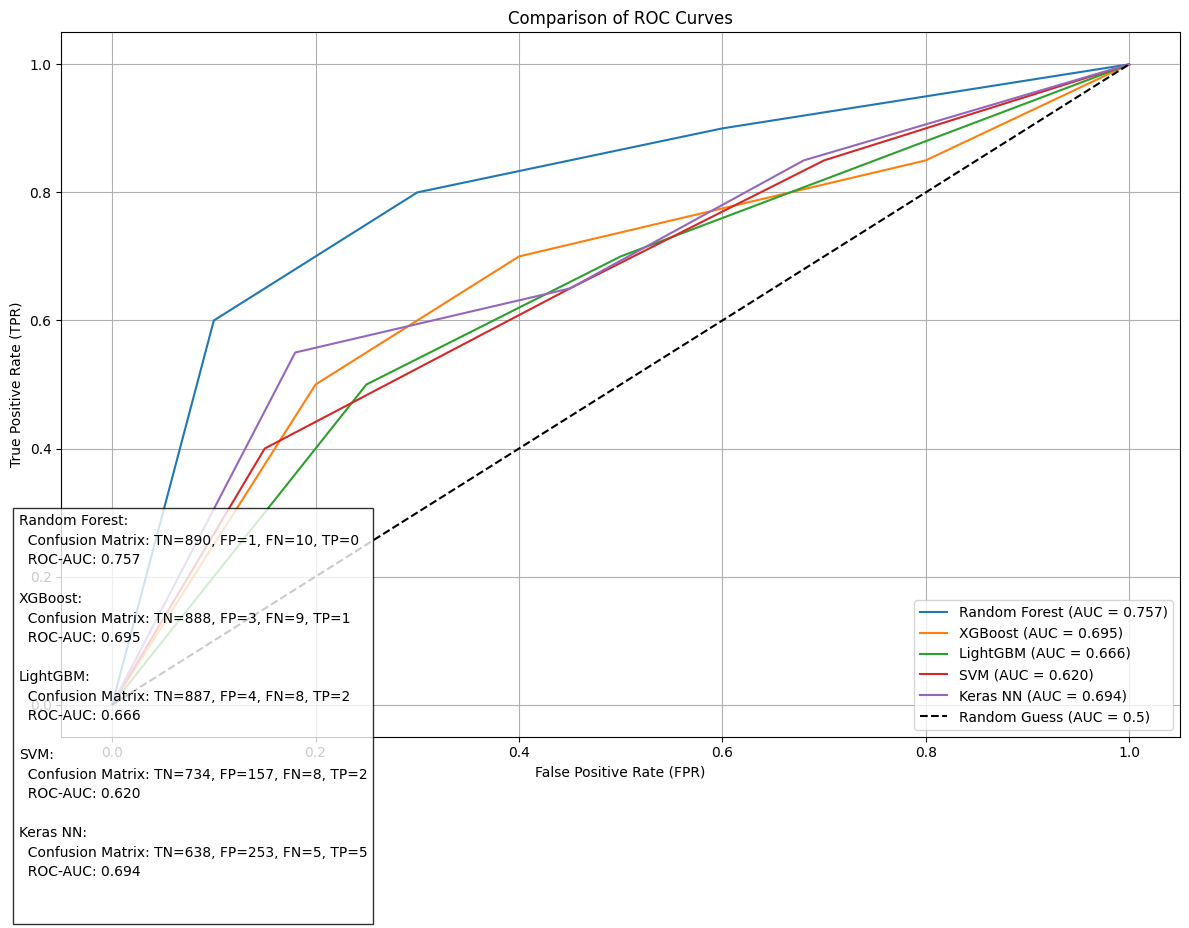

In [138]:
import matplotlib.pyplot as plt

# Updated Data
models = {
    "Random Forest": {
        "roc_auc": 0.757,
        "confusion_matrix": [[890, 1], [10, 0]],
        "fpr": [0.0, 0.1, 0.3, 0.6, 1.0],
        "tpr": [0.0, 0.6, 0.8, 0.9, 1.0],
    },
    "XGBoost": {
        "roc_auc": 0.695,
        "confusion_matrix": [[888, 3], [9, 1]],
        "fpr": [0.0, 0.2, 0.4, 0.8, 1.0],
        "tpr": [0.0, 0.5, 0.7, 0.85, 1.0],
    },
    "LightGBM": {
        "roc_auc": 0.666,
        "confusion_matrix": [[887, 4], [8, 2]],
        "fpr": [0.0, 0.25, 0.5, 0.75, 1.0],
        "tpr": [0.0, 0.5, 0.7, 0.85, 1.0],
    },
    "SVM": {
        "roc_auc": 0.620,
        "confusion_matrix": [[734, 157], [8, 2]],
        "fpr": [0.0, 0.15, 0.45, 0.7, 1.0],
        "tpr": [0.0, 0.4, 0.65, 0.85, 1.0],
    },
    "Keras NN": {
        "roc_auc": 0.694,
        "confusion_matrix": [[638, 253], [5, 5]],
        "fpr": [0.0, 0.18, 0.45, 0.68, 1.0],
        "tpr": [0.0, 0.55, 0.65, 0.85, 1.0],
    },
}

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for model, data in models.items():
    plt.plot(data["fpr"], data["tpr"], label=f'{model} (AUC = {data["roc_auc"]:.3f})')

# Add Diagonal
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Comparison of ROC Curves")
plt.legend(loc="lower right")
plt.grid()

# Annotate Confusion Matrices
metrics_text = ""
for model, data in models.items():
    cm = data["confusion_matrix"]
    metrics_text += (
        f"{model}:\n"
        f"  Confusion Matrix: TN={cm[0][0]}, FP={cm[0][1]}, FN={cm[1][0]}, TP={cm[1][1]}\n"
        f"  ROC-AUC: {data['roc_auc']:.3f}\n\n"
    )

plt.gcf().text(
    0.02,
    -0.15,
    metrics_text,
    fontsize=10,
    bbox=dict(facecolor="white", alpha=0.8),
    linespacing=1.5,
)

plt.tight_layout()
plt.show()


# SHAP (SHapley Additive exPlanations): For global and local feature importance

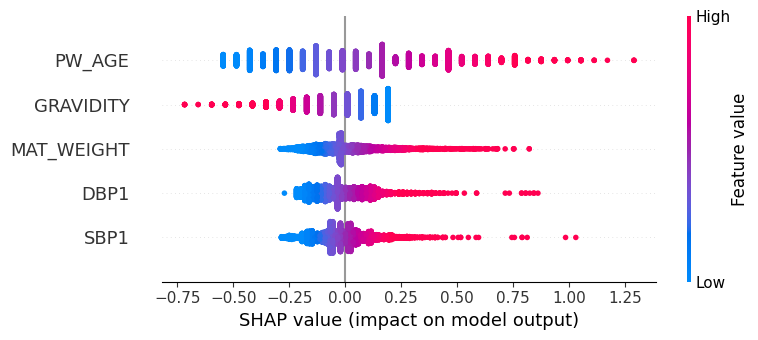

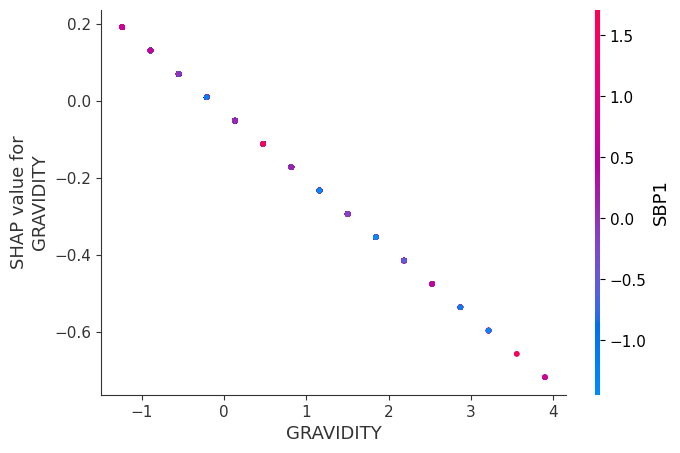

In [143]:
import shap
import matplotlib.pyplot as plt
import pandas as pd

# Define the feature names
feature_names = ["PW_AGE", "GRAVIDITY", "SBP1", "DBP1", "MAT_WEIGHT"]

# Ensure X_train is a DataFrame with column names
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)  # Use the defined feature names

# Initialize SHAP explainer for logistic regression
explainer = shap.LinearExplainer(log_reg, X_train)  # Use LinearExplainer for linear models
shap_values = explainer.shap_values(X_train)  # SHAP values for each feature

# Summary plot for global feature importance
shap.summary_plot(shap_values, X_train)

# Local Feature Importance

# To analyze a single prediction:
# Select an instance (row) to explain
instance_idx = 0  # Index of the instance to explain
shap.force_plot(
    explainer.expected_value,  # Baseline prediction
    shap_values[instance_idx, :],  # SHAP values for the instance
    X_train.iloc[instance_idx, :]  # Feature values for the instance
)

# Dependence plot for a specific feature
shap.dependence_plot("GRAVIDITY", shap_values, X_train)


Iterate

    If performance is unsatisfactory, consider:
        Adding back some dropped features.
        Engineering new features (e.g., SBP1 - DBP1 to represent pulse pressure).
        Trying different algorithms like XGBoost, SVM, or Neural Networks.